In [70]:
import pytorch_lightning as pl
from ml_aos.dataloader import Donuts
from ml_aos.lightning import DavidNet, DonutLoader
import torch
import matplotlib.pyplot as plt
import numpy as np

In [8]:
PATH = "../experiments/dutiful-shape-34/ml-aos-ml_aos/2u2bjmy2/checkpoints/epoch=72-step=66940.ckpt"
model = DavidNet.load_from_checkpoint(PATH)
model.eval()

DavidNet(
  (donut_net): DonutNet(
    (layers): ModuleList(
      (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): DownBlock(
        (layers): ModuleList(
          (0): SkipBlock(
            (layers): Sequential(
              (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=same)
              (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU(inplace=True)
            )
          )
          (1): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (3): ReLU(inplace=True)
        )
      )
      (4): DownBlock(
        (layers): ModuleList(
          (0): SkipBlock(
            (layers): Sequential(
              (0): Conv2d(16, 16, kernel_size=(3, 

In [17]:
val_donuts = DonutLoader().val_dataloader()

In [56]:
rmses = []
dists = []
fracs = []

for batch in val_donuts:

    # predict zernikes
    z_pred = model(
        batch["image"], 
        batch["field_x"], 
        batch["field_y"], 
        batch["intrafocal"]
    )

    # calculate rmse, units = arsec contribution to FWHM
    z_true = batch["zernikes"]
    rmse = torch.sqrt(torch.mean((z_true - z_pred)**2, axis=1))
    rmse = rmse.detach().numpy()

    # calculate distance from center of focal plane    
    x = batch["focal_x"]
    y = batch["focal_y"]
    dist_rads = torch.sqrt(x ** 2 + y ** 2)  # distance in radians
    dist_arcsecs = dist_rads * 206_265  # distance in arcsecs
    dist_microns = dist_arcsecs * 5  # distance in microns
    dist_meters = dist_microns / 1e6  # distance in meters
    dist_meters = dist_meters.numpy().flatten()

    # record fraction blended
    frac_blended = batch["fraction_blended"].numpy().flatten()

    # record all values
    rmses += list(rmse)
    dists += list(dist_meters)
    fracs += list(frac_blended)
    

Text(0, 0.5, 'RMSE [arcsec FWHM]')

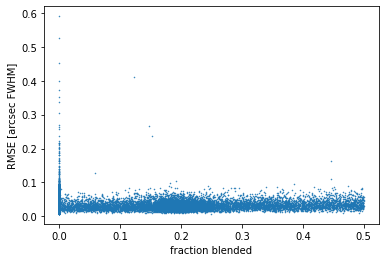

In [93]:
plt.scatter(fracs, rmses, marker=".", s=1)
plt.xlabel("fraction blended")
plt.ylabel("RMSE [arcsec FWHM]")

Text(0, 0.5, 'RMSE [arcsec FWHM]')

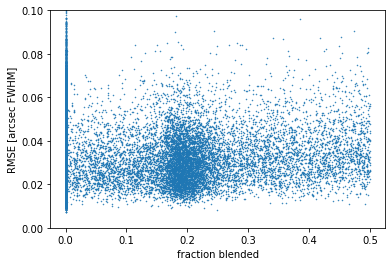

In [92]:
plt.scatter(fracs, rmses, marker=".", s=1)
plt.ylim(0, 0.1)
plt.xlabel("fraction blended")
plt.ylabel("RMSE [arcsec FWHM]")

Text(0, 0.5, 'RMSE [arcsec FWHM]')

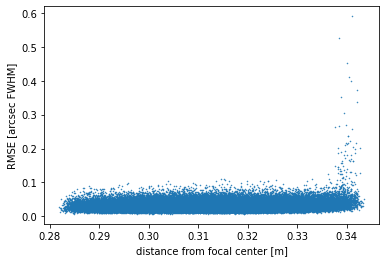

In [80]:
plt.scatter(dists, rmses, marker=".", s=1)
#plt.ylim(0, 0.1)
plt.xlabel("distance from focal center [m]")
plt.ylabel("RMSE [arcsec FWHM]")